In [1]:
#inventory management + v5

In [2]:
import numpy as np
import pandas as pd
import random as r
import math
import os
from datetime import timedelta

import matplotlib.pyplot as plot
import networkx as nx

from pyomo.environ import *
from pyomo.opt import SolverFactory
from gurobipy import GRB

In [3]:
#id directories
data_dir = os.getcwd().replace('/model', '/data')
results_dir = os.getcwd().replace('/model', '/results')

In [4]:
#define sets
K = 1
I = 3
T = 10

#define parameters
r_k_dict = {
    1 : 1
}

q_k_i_dict = {
    tuple([1,1]) : 3,
    tuple([1,2]): 2,
    tuple([1,3]): 1
}

z_k_i_init_dict = {
    tuple([1,1]) : 11918/3,
    tuple([1,2]) : 11918/3,
    tuple([1,3]) : 11918/3
}

alpha_k_init_dict = {
    1 : 10000
}

f_k_i_tDiff_dict = {
    #0 time intervals
    tuple([1,1,0]) : 0,
    tuple([1,2,0]) : 0.2,
    tuple([1,3,0]) : 0.3,
    #1 time interval
    tuple([1,1,1]) : 0,
    tuple([1,2,1]) : 0.2,
    tuple([1,3,1]) : 0.4,
    #2 time intervals
    tuple([1,1,2]) : 0,
    tuple([1,2,2]) : 0.2,
    tuple([1,3,2]) : 0.3,
    #3 time intervals
    tuple([1,1,3]) : 0.1,
    tuple([1,2,3]) : 0.2,
    tuple([1,3,3]) : 0,
    #4 time intervals
    tuple([1,1,4]) : 0.2,
    tuple([1,2,4]) : 0.2,
    tuple([1,3,4]) : 0,
    #5 time intervals
    tuple([1,1,5]) : 0.3,
    tuple([1,2,5]) : 0,
    tuple([1,3,5]) : 0,
    #6 time intervals
    tuple([1,1,6]) : 0.2,
    tuple([1,2,6]) : 0,
    tuple([1,3,6]) : 0,
    #7 time intervals
    tuple([1,1,7]) : 0.1,
    tuple([1,2,7]) : 0,
    tuple([1,3,7]) : 0,
    #8 time intervals
    tuple([1,1,8]) : 0,
    tuple([1,2,8]) : 0,
    tuple([1,3,8]) : 0,
    #9 time intervals
    tuple([1,1,9]) : 0,
    tuple([1,2,9]) : 0,
    tuple([1,3,9]) : 0,
    #10 time intervals
    tuple([1,1,10]) : .1,
    tuple([1,2,10]) : 0,
    tuple([1,3,10]) : 0
}


o_k_i_t_dict = {
    tuple([1,1,1]) : 0,
    tuple([1,2,1]) : 11000,
    tuple([1,3,1]) : 0,
    tuple([1,1,2]) : 0,
    tuple([1,2,2]) : 0,
    tuple([1,3,2]) : 0,
    tuple([1,1,3]) : 0,
    tuple([1,2,3]) : 0,
    tuple([1,3,3]) : 0,
    tuple([1,1,4]) : 0,
    tuple([1,2,4]) : 0,
    tuple([1,3,4]) : 0,
    tuple([1,1,5]) : 0,
    tuple([1,2,5]) : 0,
    tuple([1,3,5]) : 0,
    tuple([1,1,6]) : 0,
    tuple([1,2,6]) : 0,
    tuple([1,3,6]) : 0,
    tuple([1,1,7]) : 0,
    tuple([1,2,7]) : 0,
    tuple([1,3,7]) : 0,
    tuple([1,1,8]) : 0,
    tuple([1,2,8]) : 0,
    tuple([1,3,8]) : 0,
    tuple([1,1,9]) : 0,
    tuple([1,2,9]) : 0,
    tuple([1,3,9]) : 0,
    tuple([1,1,10]) : 0,
    tuple([1,2,10]) : 0,
    tuple([1,3,10]) : 0
}

s_k_dict = {
    1 : .5
}

h = 11918 #assuming warehouse capacity is not an issue

c_k_i_dict = {
    tuple([1,1]) : .5,
    tuple([1,2]) : .8,
    tuple([1,3]) : 1
}

b = 118000

CAP_k_i_t_dict_mu_sd = {
    tuple([1,1,1]) : [1000, 100], 
    tuple([1,1,2]) : [1000, 100],
    tuple([1,1,3]) : [1000, 100],
    tuple([1,1,4]) : [1000, 100],
    tuple([1,1,5]) : [1000, 100],
    tuple([1,1,6]) : [1000, 100],
    tuple([1,1,7]) : [1000, 100],
    tuple([1,1,8]) : [1000, 100],
    tuple([1,1,9]) : [1000, 100],
    tuple([1,1,10]) : [1000, 100],
    tuple([1,2,1]) : [20000, 200],
    tuple([1,2,2]) : [20000, 200],
    tuple([1,2,3]) : [20000, 200],
    tuple([1,2,4]) : [20000, 200],
    tuple([1,2,5]) : [20000, 200],
    tuple([1,2,6]) : [20000, 200],
    tuple([1,2,7]) : [20000, 200],
    tuple([1,2,8]) : [20000, 200],
    tuple([1,2,9]) : [20000, 200],
    tuple([1,2,10]) : [50000, 300],
    tuple([1,3,1]) : [50000, 300],
    tuple([1,3,2]) : [50000, 300],
    tuple([1,3,3]) : [50000, 300],
    tuple([1,3,4]) : [50000, 300],
    tuple([1,3,5]) : [50000, 300],
    tuple([1,3,6]) : [50000, 300],
    tuple([1,3,7]) : [50000, 300],
    tuple([1,3,8]) : [50000, 300],
    tuple([1,3,9]) : [50000, 300],
    tuple([1,3,10]) : [50000, 300]
}

D_k_t_dict_mu_sd = {
    tuple([1,1]) : [11800, 118],
    tuple([1,2]) : [11800, 118],
    tuple([1,3]) : [11800, 118],
    tuple([1,4]) : [11800, 118],
    tuple([1,5]) : [11800, 118],
    tuple([1,6]) : [11800, 118],
    tuple([1,7]) : [11800, 118],
    tuple([1,8]) : [11800, 118],
    tuple([1,9]) : [11800, 118],
    tuple([1,10]) : [11800, 118]
}

In [5]:
#data checks

mu = 0

for k in range(K):
    for t in range(T):
        mu = D_k_t_dict_mu_sd.get(tuple([k+1,t+1]))[0] + mu


check = np.zeros(3)

for k in range(1,K+1):
    for i in range(1,I+1):
        for t in range(T+1):
            check[i-1] = f_k_i_tDiff_dict.get(tuple([k,i,t])) + check[i-1]

In [6]:
z_k_i_init_dict

{(1, 1): 3972.6666666666665,
 (1, 2): 3972.6666666666665,
 (1, 3): 3972.6666666666665}

In [7]:
model = ConcreteModel()

#####define sets#######
model.K = Set(initialize = range(1,K+1))
model.I = Set(initialize = range(1,I+1))
model.T = Set(initialize = range(1,T+1))
#model.T_beg = Set(initialize = range(0,T+1))

####initialize parameters####

def rank_param_initialize(model, k):
    return(r_k_dict.get(k))

model.r_k = Param(model.K, initialize = rank_param_initialize)

def penalty_param_initialize(model, k):
    return(1/model.r_k[k])

model.p_k = Param(model.K, initialize = penalty_param_initialize)

def discount_param_initialize(model, k, t):
    discount_temp = model.p_k[k]
    #time_diff = T-t
    return(1/((1+discount_temp)**(t-1)))

model.tau_k_t = Param(model.K, model.T, initialize = discount_param_initialize)

def quality_param_initialize(model, k, i):
    return(q_k_i_dict.get(tuple([k,i])))

model.q_k_i = Param(model.K, model.I, initialize = quality_param_initialize)

def beg_inv_param_initialize(model, k, i):
    return(z_k_i_init_dict.get(tuple([k,i])))

model.z_k_i_init = Param(model.K, model.I, initialize = beg_inv_param_initialize)

def unfulfilled_demand_param_initialize(model, k):
    return(alpha_k_init_dict.get(k))

model.alpha_k_intialize = Param(model.K, initialize = unfulfilled_demand_param_initialize)

def delay_dist_param_initialize(model, k, i, t):
    return(f_k_i_tDiff_dict.get(tuple([k,i,t])))

model.f_k_i_tDiff = Param(model.K, model.I, model.T, initialize = delay_dist_param_initialize)

def incoming_orders_initialize(model, k, i, t):
    return(o_k_i_t_dict.get(tuple([k,i,t])))

model.o_k_i_t = Param(model.K, model.I, model.T, initialize = incoming_orders_initialize)

def item_size_param_initialize(model, k):
    return(s_k_dict.get(k))

model.s_k = Param(model.K, initialize = item_size_param_initialize)

def warehouse_cap_param_initialize(model):
    return(h)

model.h = Param(initialize = h)

def cost_param_initialize(model, k, i):
    return(c_k_i_dict.get(tuple([k,i])))

model.c_k_i = Param(model.K, model.I, initialize = cost_param_initialize)

def budget_param_initialize(model):
    return(b)

model.b = Param(initialize = budget_param_initialize)

def supplier_cap_param_initialize(model, k, i, t):
    return(sum(CAP_k_i_t_dict_mu_sd.get(tuple([k,i,t]))))

model.cap = Param(model.K, model.I, model.T, initialize = supplier_cap_param_initialize)

#assume preparing for one sd above the mean
def mu_plus_sigma_demand_param_initialize(model, k, t):
    return(sum(D_k_t_dict_mu_sd.get(tuple([k,t]))))

model.d_k_t = Param(model.K, model.T, initialize = mu_plus_sigma_demand_param_initialize)

####initialize variables####
model.x_k_i_t = Var(model.K, model.I, model.T, within = NonNegativeReals) #amount ordered
model.y_k_i_t = Var(model.K, model.I, model.T, within = NonNegativeReals) #amount recieved
model.z_k_i_t = Var(model.K, model.I, model.T, within = NonNegativeReals)
model.alpha_k_t = Var(model.K, model.T, within = NonNegativeReals)
model.beta_k_i_t = Var(model.K, model.I, model.T, within = NonNegativeReals)

In [8]:
model.tau_k_t.pprint()

tau_k_t : Size=10, Index=tau_k_t_index, Domain=Any, Default=None, Mutable=False
    Key     : Value
     (1, 1) :         1.0
     (1, 2) :         0.5
     (1, 3) :        0.25
     (1, 4) :       0.125
     (1, 5) :      0.0625
     (1, 6) :     0.03125
     (1, 7) :    0.015625
     (1, 8) :   0.0078125
     (1, 9) :  0.00390625
    (1, 10) : 0.001953125


In [9]:
#def initialize_objective(model):
model.Objective = Objective(expr = 
                            (sum(model.q_k_i[k,i]*sum(model.tau_k_t[k,t]*model.beta_k_i_t[k,i,t] 
                                                      for t in model.T) 
                                 for i in model.I for k in model.K)),
                            sense = maximize)

In [10]:
def beggining_inventory_constraint_initialize(model, k, i):
    return(model.z_k_i_t[k,i,1] == model.z_k_i_init[k,i])
    
model.beggining_inventory_constraint = Constraint(model.K, model.I, 
                                                  rule = beggining_inventory_constraint_initialize)

In [11]:
def initalize_unsatisfied_demand_constraint_initialize(model, k):
    return(model.alpha_k_t[k,1] == model.alpha_k_intialize[k])

model.initalize_unsatisfied_demand_constraint_initialize = \
Constraint(model.K, rule = initalize_unsatisfied_demand_constraint_initialize)

In [12]:
def incoming_orders_constraint_initialize(model, k, i, t):
    return(model.y_k_i_t[k,i,t] - sum(model.f_k_i_tDiff[k, i, t-t_ordered_time]*model.x_k_i_t[k,i,t_ordered_time] for t_ordered_time in range(1,t)) - 
           model.o_k_i_t[k,i,t] == 0)

model.incoming_ordered_constraint = Constraint(model.K, model.I, model.T, 
                                               rule = incoming_orders_constraint_initialize)

In [13]:
def calculate_available_inventory_constraint_initialize(model, k, i, t):
    if (t > 1):
        return(model.z_k_i_t[k,i,t] - model.z_k_i_t[k,i,t-1] - model.y_k_i_t[k,i,t-1] + model.beta_k_i_t[k,i,t-1] == 0)
    else:
        return(Constraint.Skip)
    
model.calculate_available_inventory_constraint = Constraint(model.K, model.I, model.T,
                                                            rule = 
                                                            calculate_available_inventory_constraint_initialize)

In [14]:
def cannot_fulfill_more_than_available_constraint_initialize(model, k,i,t):
    return(model.beta_k_i_t[k,i,t] - model.z_k_i_t[k,i,t] <= 0)

model.cannot_fulfill_more_than_available_constraint = \
Constraint(model.K, model.I, model.T, rule = cannot_fulfill_more_than_available_constraint_initialize)

In [15]:
def calculate_unsatisfied_demand_constraint_initialize(model,k,t):
    if t > 1:
        return(model.alpha_k_t[k,t] - model.alpha_k_t[k,t-1] + sum(model.beta_k_i_t[k,i,t] for i in model.I) == \
               model.d_k_t[k,t])
    else:
        return(Constraint.Skip)

model.calculate_unsatisfied_demand_constraint = \
Constraint(model.K, model.T, rule = calculate_unsatisfied_demand_constraint_initialize)

In [16]:
def warehouse_capacity_constraint_initialize(model, t):
    return(sum(model.s_k[k]*model.z_k_i_t[k,i,t] for k in model.K for i in model.I) <= model.h)

model.warehouse_capacity_constraint = \
Constraint(model.T, rule = warehouse_capacity_constraint_initialize)

In [17]:
def budget_constraint_initialize(model):
    return(sum(model.c_k_i[k,i]*model.x_k_i_t[k,i,t] 
               for k in model.K for i in model.I for t in model.T) 
           <= model.b)

model.budget_constraint = \
Constraint(rule = budget_constraint_initialize)

In [18]:
def supplier_constraint_initialize(model, k, i, t):
    return(model.x_k_i_t[k,i,t] <= model.cap[k,i,t])

model.supplier_constraint = \
Constraint(model.K, model.I, model.T, rule = supplier_constraint_initialize)

In [19]:
opt = SolverFactory('gurobi_persistent')
opt.set_instance(model)
opt.solve(model)

Using license file /Users/chelseagreene/gurobi.lic
Academic license - for non-commercial use only


{'Problem': [{'Name': 'unknown', 'Lower bound': 46986.62109374999, 'Upper bound': 46986.62109374999, 'Number of objectives': 1, 'Number of constraints': 141, 'Number of variables': 130, 'Number of binary variables': 0, 'Number of integer variables': 0, 'Number of continuous variables': 130, 'Number of nonzeros': 409, 'Sense': -1, 'Number of solutions': 1}], 'Solver': [{'Name': 'Gurobi 9.01', 'Status': 'ok', 'Wallclock time': 0.0015261173248291016, 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.'}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [20]:
#extract ordering df
ordered_df = pd.DataFrame(list(model.x_k_i_t.extract_values().items()),columns = ['sets','units_to_order'])
ordered_df.loc[:,'item_type']=ordered_df.sets.map(lambda x:x[0])
ordered_df.loc[:,'supplier']=ordered_df.sets.map(lambda x:x[1])
ordered_df.loc[:,'time_interval']=ordered_df.sets.map(lambda x:x[2])

In [21]:
#extract expected arrivals df
recieved_df = pd.DataFrame(list(model.y_k_i_t.extract_values().items()),columns = ['sets','expected_units_recieved'])
recieved_df.loc[:,'item_type']=recieved_df.sets.map(lambda x:x[0])
recieved_df.loc[:,'supplier']=recieved_df.sets.map(lambda x:x[1])
recieved_df.loc[:,'time_interval']=recieved_df.sets.map(lambda x:x[2])

In [22]:
#extract expected fulfilled df
fulfilled_df = pd.DataFrame(list(model.beta_k_i_t.extract_values().items()),columns = ['sets','units_fulfilled'])
fulfilled_df.loc[:,'item_type']=fulfilled_df.sets.map(lambda x:x[0])
fulfilled_df.loc[:,'supplier']=fulfilled_df.sets.map(lambda x:x[1])
fulfilled_df.loc[:,'time_interval']=fulfilled_df.sets.map(lambda x:x[2])

In [23]:
#extract expected available df
available_df = pd.DataFrame(list(model.z_k_i_t.extract_values().items()),columns = ['sets','units_available'])
available_df.loc[:,'item_type']=available_df.sets.map(lambda x:x[0])
available_df.loc[:,'supplier']=available_df.sets.map(lambda x:x[1])
available_df.loc[:,'time_interval']=available_df.sets.map(lambda x:x[2])

In [24]:
#extract expected unsatisfied df
unsatisfied_df = pd.DataFrame(list(model.alpha_k_t.extract_values().items()),columns = ['sets','units_unsatisfied'])
unsatisfied_df.loc[:,'item_type']=unsatisfied_df.sets.map(lambda x:x[0])
unsatisfied_df.loc[:,'time_interval']=unsatisfied_df.sets.map(lambda x:x[1])

In [25]:
unsatisfied_df

,sets,units_unsatisfied,item_type,time_interval
0,"(1, 1)",10000.0,1,1
1,"(1, 2)",10918.0,1,2
2,"(1, 3)",0.0,1,3
3,"(1, 4)",0.0,1,4
4,"(1, 5)",0.0,1,5
5,"(1, 6)",0.0,1,6
6,"(1, 7)",0.0,1,7
7,"(1, 8)",0.0,1,8
8,"(1, 9)",0.0,1,9
9,"(1, 10)",1949.0,1,10


In [26]:
demand_df = pd.DataFrame(list(model.d_k_t.extract_values().items()), columns = ['sets', 'demand_in_units'])
demand_df.loc[:,'item_type']=demand_df.sets.map(lambda x:x[0])
demand_df.loc[:,'time_interval']=demand_df.sets.map(lambda x:x[1])

In [27]:
ordered_and_recieved_df = ordered_df[['item_type', 'supplier', 'time_interval', 'sets']]
ordered_and_recieved_df = ordered_and_recieved_df.merge(recieved_df[['sets', 'expected_units_recieved']],
                                                        on='sets', how='left')
ordered_and_recieved_df = ordered_and_recieved_df.merge(ordered_df[['sets', 'units_to_order']],
                                                        on='sets', how='left')

ordered_and_recieved_df = ordered_and_recieved_df[['item_type', 'supplier', 
                                                   'time_interval','units_to_order', 
                                                   'expected_units_recieved']]

ordered_and_recieved_df['units_to_order'] = (round(ordered_and_recieved_df['units_to_order'])).astype(int)
ordered_and_recieved_df['expected_units_recieved'] = (round(ordered_and_recieved_df['expected_units_recieved'])).astype(int)

In [28]:
os.chdir(results_dir)
ordered_and_recieved_df.to_csv('ordering_and_recieving_schedule.csv')

In [29]:
fulfilled_df

,sets,units_fulfilled,item_type,supplier,time_interval
0,"(1, 1, 1)",3972.666667,1,1,1
1,"(1, 1, 2)",0.000000,1,1,2
2,"(1, 1, 3)",0.000000,1,1,3
3,"(1, 1, 4)",0.000000,1,1,4
4,"(1, 1, 5)",110.000000,1,1,5
5,"(1, 1, 6)",330.000000,1,1,6
6,"(1, 1, 7)",660.000000,1,1,7
7,"(1, 1, 8)",880.000000,1,1,8
8,"(1, 1, 9)",880.000000,1,1,9
9,"(1, 1, 10)",660.000000,1,1,10


In [30]:
s1_fulfilled = fulfilled_df[fulfilled_df['supplier'] == 1]
s2_fulfilled = fulfilled_df[fulfilled_df['supplier'] == 2]
s3_fulfilled = fulfilled_df[fulfilled_df['supplier'] == 3]

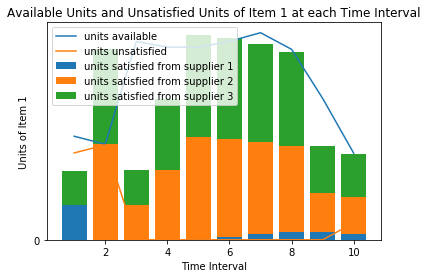

In [31]:
available_overtime_df = available_df.groupby(['time_interval'])["units_available"].sum().reset_index()
p1 = plot.plot(available_overtime_df['time_interval'], 
               available_overtime_df['units_available'], 
               label='units available') 
p2 = plot.plot(unsatisfied_df['time_interval'], 
               unsatisfied_df['units_unsatisfied'], 
               label='units unsatisfied') 
p3 = plot.bar(s1_fulfilled['time_interval'], 
              s1_fulfilled['units_fulfilled'], 
              label='units satisfied from supplier 1') 
p4 = plot.bar(s2_fulfilled['time_interval'], 
              s2_fulfilled['units_fulfilled'], 
              label='units satisfied from supplier 2',
             bottom = s1_fulfilled['units_fulfilled'])
p5 = plot.bar(s2_fulfilled['time_interval'], 
              s2_fulfilled['units_fulfilled'], 
              label='units satisfied from supplier 3',
              bottom = s2_fulfilled['units_fulfilled'])


plot.xlabel('Time Interval')
plot.ylabel('Units of Item 1')
plot.yticks(np.arange(0, T, 10))
plot.title('Available Units and Unsatisfied Units of Item 1 at each Time Interval')
plot.legend()
plot.savefig('available_and_unsatisfied_lineplot.jpg')

In [32]:
pos_dict_all = {}
label_dict_all = {}
color_dict_all = {}
G_dict_all = {}

In [33]:
for i in range(1,I+1):
    G=nx.Graph()
    label_dict = {}
    color_map = []
    
    global ordered_df
    global recieved_df
    
    time_coordinates = range(1,T+1)
    ordered_amount_coordinates = np.array(ordered_df[(ordered_df['supplier'] == i)]['units_to_order'])
    recieved_amount_coordinates = np.array(recieved_df[(recieved_df['supplier'] == i)]['expected_units_recieved'])

    for t in range(T):
        ordered_amount = ordered_amount_coordinates[t]
        recieved_amount = recieved_amount_coordinates[t]

        if (ordered_amount > 0):
            name = str(t) + 'planned units to order' + str(ordered_amount)
            G.add_node(name, pos = (t+1,1))
            label_dict[name] = round(ordered_amount).astype(int)
            color_map.append('blue')

        if (recieved_amount > 0):
            name = str(t) + 'expected number of units recieved' + str(recieved_amount)
            G.add_node(name, pos = (t+1,2))
            label_dict[name] = round(recieved_amount).astype(int)
            color_map.append('green')

    pos=nx.get_node_attributes(G,'pos')
    label_dict_all['supplier' + str(i)] = label_dict
    color_dict_all['supplier' + str(i)] = color_map
    pos_dict_all['supplier' + str(i)] = pos
    G_dict_all['supplier' + str(i)] = G

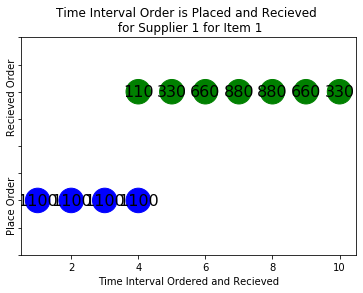

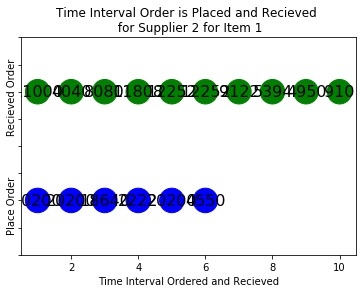

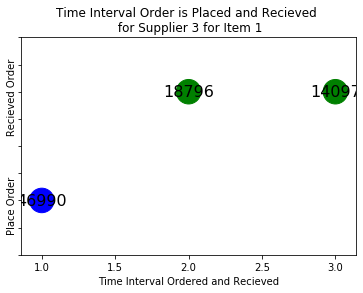

In [34]:
for i in range(1, I+1):

    fig, ax = plot.subplots()
    nx.draw(G_dict_all.get('supplier' + str(i)),
            pos_dict_all.get('supplier' + str(i)), 
            labels=label_dict_all.get('supplier' + str(i)), 
            node_size=600, font_size=16, with_labels = True, 
            node_color=color_dict_all.get('supplier' + str(i)), 
            ax = ax)
    ax.set_xlabel('Time Interval Ordered and Recieved')
    ax.set_ylabel('Place Order             Recieved Order')
    ax.set(ylim=(.5, 2.5))
    ax.set_title('Time Interval Order is Placed and Recieved \n for Supplier '+ str(i)+' for Item 1')
    ax.tick_params(left=True, bottom=True, labelleft=False, labelbottom=True)
    limits=plot.axis('on')
    plot.savefig('Item_1_Supplier' + str(i)+'.jpg')